In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
print("Imported")

Imported


In [2]:
train = pd.read_csv("diamonds.csv")
test = pd.read_csv("new-diamonds.csv")

In [3]:
train.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [4]:
test.head(3)

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5


In [5]:
train1 = pd.get_dummies(train, columns=['cut','clarity', 'color'])
test1 = pd.get_dummies(test, columns=['cut','clarity', 'color'])

train1.reset_index(drop=True, inplace=True)
test1.reset_index(drop=True, inplace=True)

In [7]:
df_train = train1.drop(['Unnamed: 0'], axis = 1)
df_test = test1.drop(['Unnamed: 0'], axis = 1)

In [10]:
df_train.head(3)

,carat,cut_ord,clarity_ord,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.51,4,4,1749,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2.25,1,1,7069,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.70,3,5,2757,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [11]:
df_test.head(3)

,carat,cut_ord,clarity_ord,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1.22,4,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,1.01,2,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0.71,3,5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [12]:
#ANALYSING THE DATASET:
print('Dimension of dataset:{}'.
      format(df_train.shape),'\n',75*'-')
print('name of the columns:{}'.
      format(df_train.columns),'\n',75*'-')
print('Number of duplicated values:{}'.
      format(df_train.duplicated().sum()),'\n',75*'-')
print('rows contain null values:\n{}'.
      format(df_train.isnull().sum()),'\n',75*'-')
print('Schema of the dataset:\n{}'.
      format(df_train.info()),'\n',75*'-')
print('Descriptive Analysis:\n{}'.
      format(df_train.describe()),'\n',75*'-')
print('Correlation:\n{}'.
      format(df_train.corr()))

Dimension of dataset:(50000, 24) 
 ---------------------------------------------------------------------------
name of the columns:Index(['carat', 'cut_ord', 'clarity_ord', 'price', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object') 
 ---------------------------------------------------------------------------
Number of duplicated values:12743 
 ---------------------------------------------------------------------------
rows contain null values:
carat            0
cut_ord          0
clarity_ord      0
price            0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0


In [19]:
X = df_train[['carat', 'cut_ord', 'clarity_ord', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J']]
Y = df_train['price']

In [23]:
X_test = df_test[['carat', 'cut_ord', 'clarity_ord', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J']]

In [20]:
df_train.columns

Index(['carat', 'cut_ord', 'clarity_ord', 'price', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [21]:
df_test.columns

Index(['carat', 'cut_ord', 'clarity_ord', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [22]:
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
predict = regressor.predict(X_test)

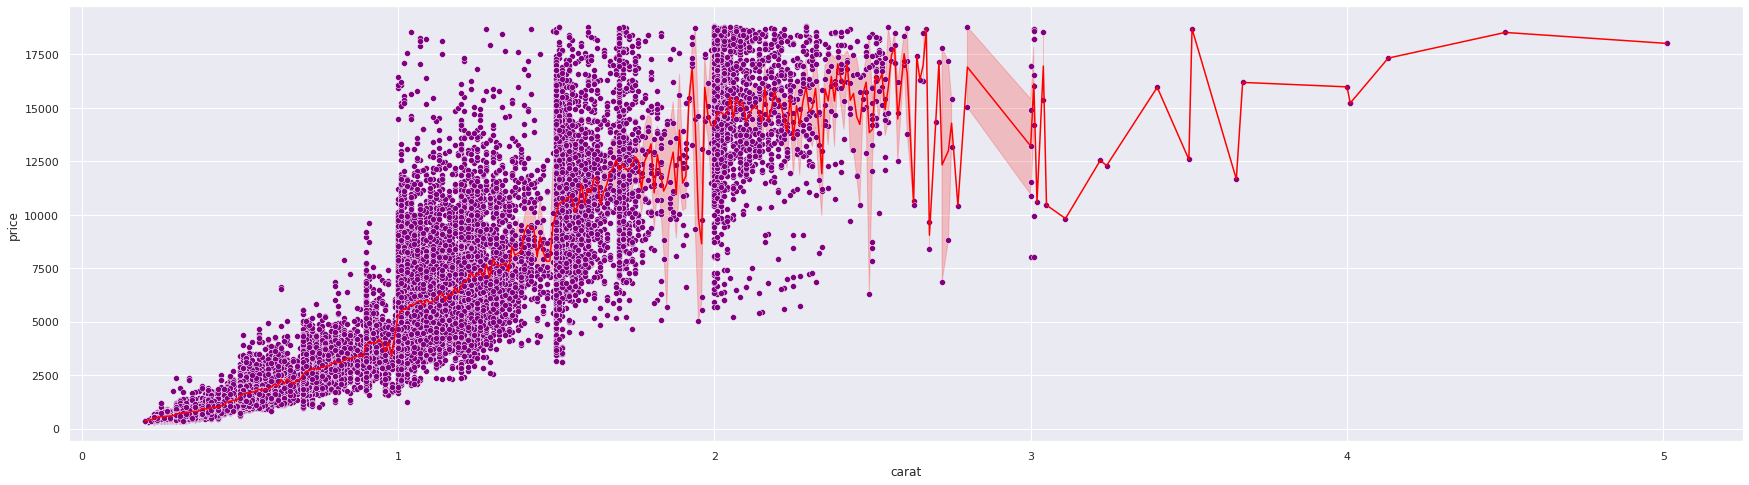

In [38]:
plt.figure(figsize = (30, 8))
sns.set_theme()
sns.lineplot(x = df_train['carat'], y = df_train['price'], color = 'red')
sns.scatterplot(x = df_train['carat'], y = df_train['price'], color = 'purple')
plt.show()

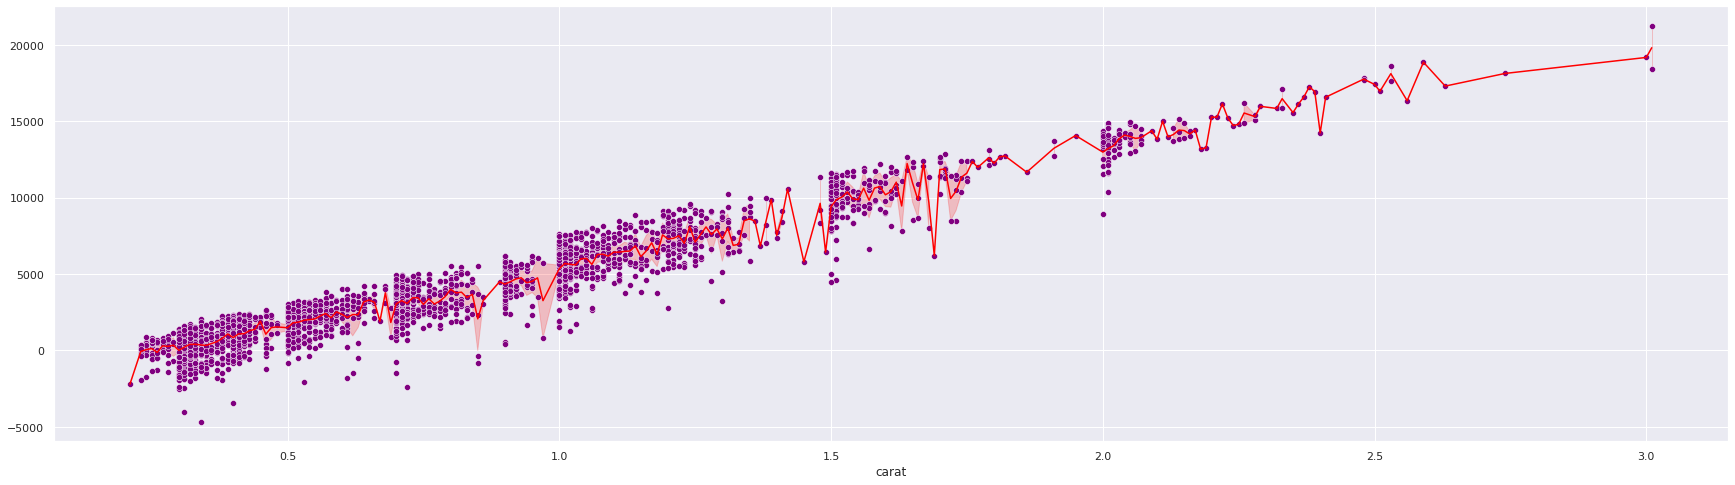

In [37]:
plt.figure(figsize = (30, 8))
sns.set_theme()
sns.lineplot(x = df_test['carat'], y = predict, color = 'red')
sns.scatterplot(x = df_test['carat'], y = predict, color = 'purple')
plt.show()